In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import csv
import os
import re
from pyproj import Transformer


In [41]:
hectointervallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectointervallen.txt") 


df= hectointervallen
hectointervallen = df[df.nunique()[df.nunique() != 1].index]
# hectointervallen['1']= hectointervallen['WVK_ID']

hectointervallen.columns


Index(['WVK_ID', 'WVK_BEGDAT', 'ENDAFSTAND', 'BEGKM', 'ENDKM'], dtype='object')

In [42]:
hectopunten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectopunten.txt") 

df= hectopunten
hectopunten = df[df.nunique()[df.nunique() != 1].index]
# hectopunten['1']= hectopunten['WVK_ID']
hectopunten.columns

Index(['WVK_ID', 'WVK_BEGDAT', 'HECTOMETER', 'AFSTAND', 'ENDDAT', 'FK_VELD5'], dtype='object')

In [43]:
# junctiehectometrering = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\junctiehectometrering.txt") 

# df= junctiehectometrering
# junctiehectometrering = df[df.nunique()[df.nunique() != 1].index]


# junctiehectometrering

In [44]:
juncties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\juncties.txt") 

df= juncties
juncties = df[df.nunique()[df.nunique() != 1].index]

juncties

,JTE_ID,WBRSRT_R,WBRSRT_P,WBRSRT_G,WBRSRT_W,WBRSRT_T,ANTL_TAK,ACTUEEL,SLE_TYPE,SLE_NUMMER,FK_VELD5
0,37144021,N,N,N,J,N,3,J,NaN,NaN,JTE0037144021
1,37145001,N,N,N,J,N,3,J,NaN,NaN,JTE0037145001
2,37145006,N,N,N,J,N,3,J,NaN,NaN,JTE0037145006
3,37145009,N,N,N,J,N,3,J,NaN,NaN,JTE0037145009
4,37145011,N,N,N,J,N,3,J,NaN,NaN,JTE0037145011
...,...,...,...,...,...,...,...,...,...,...,...
1029404,600349526,N,N,J,N,N,1,J,NaN,NaN,JTE0600349526
1029405,600349533,N,N,J,N,N,2,J,NaN,NaN,JTE0600349533
1029406,600349539,N,N,J,N,N,3,J,K,538531006.0,JTE0600349539
1029407,600354806,N,N,J,N,N,3,J,NaN,NaN,JTE0600354806


In [45]:
puntlocaties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\puntlocaties.txt") 

df= puntlocaties
puntlocaties = df[df.nunique()[df.nunique() != 1].index]

puntlocaties.columns

Index(['FK_VELD5', 'X_COORD', 'Y_COORD'], dtype='object')

In [46]:
# wegvakken = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\wegvakken.txt", encoding="ISO-8859-1")

# df= wegvakken
# wegvakken = df[df.nunique()[df.nunique() != 1].index]

# wegvakken


In [47]:
ongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\ongevallen.txt", encoding="ISO-8859-15")

df= ongevallen
ongevallen = df[df.nunique()[df.nunique() != 1].index]


ongevallen.columns

C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\4101765156.py:1: DtypeWarning: Columns (1,24,39) have mixed types. Specify dtype option on import or set low_memory=False.
  ongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\ongevallen.txt", encoding="ISO-8859-15")


Index(['VKL_NUMMER', 'REGNUMMER', 'PVOPGEM', 'DATUM_VKL', 'DAG_CODE',
       'MND_NUMMER', 'TIJDSTIP', 'UUR', 'DDL_ID', 'AP3_CODE', 'AP4_CODE',
       'AP5_CODE', 'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV',
       'ANTL_PTJ', 'ANTL_TDT', 'MNE_CODE', 'AOL_ID', 'NIVEAUKOP', 'WSE_ID',
       'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN',
       'LGD_ID', 'ZAD_ID', 'WGD_CODE_1', 'WGD_CODE_2', 'BZD_ID_VM1',
       'BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', 'BZD_ID_IF2',
       'BZD_ID_IF3', 'BZD_IF_AN', 'BZD_ID_TA1', 'BZD_ID_TA2', 'BZD_ID_TA3',
       'JTE_ID', 'WVK_ID', 'HECTOMETER', 'FK_VELD5', 'HUISNUMMER', 'GME_ID',
       'GME_NAAM', 'PVE_CODE', 'PVE_NAAM', 'KDD_NAAM', 'PLT_NAAM',
       'DIENSTCODE', 'DIENSTNAAM', 'DISTRCODE', 'DISTRNAAM', 'DAGTYPE',
       'IND_ALC', 'WEEKNR'],
      dtype='object')

In [48]:
ongevallen.drop(columns=['PVOPGEM', 'WVL_ID','WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN',
                         'LGD_ID', 'BZD_ID_VM1','BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', 'BZD_ID_IF2',
                         'BZD_ID_IF3', 'BZD_IF_AN', 'BZD_ID_TA1', 'BZD_ID_TA2', 'BZD_ID_TA3', 'HUISNUMMER'], inplace=True)

C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\2510285755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ongevallen.drop(columns=['PVOPGEM', 'WVL_ID','WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN',


In [49]:
# Ongevallengegevens = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\partijen.txt") 

# df= Ongevallengegevens
# Ongevallengegevens = df[df.nunique()[df.nunique() != 1].index]


# Ongevallengegevens.columns

In [50]:
# baansubsoorten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenNetwerk\baansubsoorten.txt") 
# baansubsoorten

In [51]:
# hectopunten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenNetwerk\relatieveposities.txt") 
# hectopunten

In [52]:
# aangrijppunten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\aangrijppunten.txt") 
# aangrijppunten

In [53]:
# aardongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\aardongevallen.txt") 
# aardongevallen

In [54]:
# aflopen3 = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\aflopen3.txt") 
# aflopen3

In [55]:
# aflopen4 = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\aflopen4.txt") 
# aflopen4

In [56]:
# aflopen5 = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\aflopen5.txt") 
# aflopen5

In [57]:
# bewegingen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\bewegingen.txt") 
# bewegingen

In [58]:
# bijzonderheden = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\bijzonderheden.txt") 
# bijzonderheden

In [59]:
# dagdelen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\dagdelen.txt") 
# dagdelen

In [60]:
# dagen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\dagen.txt") 
# dagen

In [61]:
# leeftijdsklassen_grof = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\leeftijdsklassen_grof.txt") 
# leeftijdsklassen_grof

In [62]:
# lichtgesteldheden = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\lichtgesteldheden.txt") 
# lichtgesteldheden

In [63]:
# maanden = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\maanden.txt") 
# maanden

In [64]:
# manoeuvres = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\manoeuvres.txt") 
# manoeuvres

In [65]:
# objecttypes = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\objecttypes.txt") 
# objecttypes

In [66]:
# toedrachten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\toedrachten.txt") 
# toedrachten

In [67]:
# wegdekken = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\wegdekken.txt") 
# wegdekken

In [68]:
# wegsituaties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\wegsituaties.txt") 
# wegsituaties

In [69]:
# wegverhardingen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\wegverhardingen.txt") 
# wegverhardingen

In [70]:
# wegverlichtingen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\wegverlichtingen.txt") 
# wegverlichtingen

In [71]:
# zichtafstanden = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\ReferentiebestandenOngevallen\zichtafstanden.txt") 
# zichtafstanden

In [72]:
# samengevoegd_df = hectointervallen.merge(hectopunten, on='WVK_ID', how='left')
# samengevoegd_df = samengevoegd_df.merge(wegvakken, on='WVK_ID', how='inner')
# samengevoegd_df['JTE_ID']= (samengevoegd_df['JTE_ID_BEG']+samengevoegd_df['JTEJTE_ID_END_ID'])/2
# samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
# samengevoegd_df = samengevoegd_df.merge(hectopunten, on='WVK_ID', how='left')
# samengevoegd_df = samengevoegd_df.merge(hectopunten, on='WVK_ID', how='left')
# samengevoegd_df

In [73]:
samengevoegd_df = ongevallen.merge(juncties, on='JTE_ID', how='left')
samengevoegd_df['FK_VELD5']=samengevoegd_df['FK_VELD5_y']
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
# samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
df= samengevoegd_df
samengevoegd_df = df[df.nunique()[df.nunique() != 1].index]
samengevoegd_df.drop(columns=['AP4_CODE', 'AP5_CODE', 'FK_VELD5_y',  
                              'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER',
                              'TIJDSTIP', 'UUR', 'DDL_ID', 'DAGTYPE', 'WEEKNR',
                              'ANTL_SEH','ANTL_GOV','ANTL_TDT', 'MNE_CODE', 'ZAD_ID', 'WGD_CODE_2',
                              'IND_ALC'], inplace=True)

df= samengevoegd_df
# df.columns
df2=df[['X_COORD', 'Y_COORD', 'VKL_NUMMER']]
df2['X']=df2['X_COORD']
df2['Y']=df2['Y_COORD']
df2.drop(columns=['X_COORD', 'Y_COORD'], inplace=True)

C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\2877322096.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X']=df2['X_COORD']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\2877322096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y']=df2['Y_COORD']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\2877322096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [74]:
samengevoegd_df.columns

Index(['VKL_NUMMER', 'REGNUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID',
       'NIVEAUKOP', 'WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WGD_CODE_1', 'JTE_ID',
       'WVK_ID', 'HECTOMETER', 'FK_VELD5_x', 'GME_ID', 'GME_NAAM', 'PVE_CODE',
       'PVE_NAAM', 'KDD_NAAM', 'PLT_NAAM', 'DIENSTCODE', 'DIENSTNAAM',
       'DISTRCODE', 'DISTRNAAM', 'WBRSRT_R', 'WBRSRT_P', 'WBRSRT_G',
       'WBRSRT_W', 'WBRSRT_T', 'ANTL_TAK', 'ACTUEEL', 'SLE_TYPE', 'SLE_NUMMER',
       'FK_VELD5', 'X_COORD', 'Y_COORD'],
      dtype='object')

In [75]:
trans = Transformer.from_crs("ETRS89", "EPSG:4326", always_xy=True)
xx, yy = trans.transform(df2["X"].values, df2["Y"].values)

df2["X"] = xx
df2["Y"] = yy
df2["X"] = (df2["X"]/64000)+3
df2["Y"] = (df2["Y"]/110000)+48
# df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

df2=df2[['X', 'Y', 'VKL_NUMMER']]
df2.dropna()
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.X, df2.Y))
gdf.dropna()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\1687249952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["X"] = xx
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\1687249952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Y"] = yy
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\1687249952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,X,Y,VKL_NUMMER,geometry
8,5.698422,51.700464,20210000435,POINT (5.69842 51.70046)
16,5.440999,51.761055,20210000567,POINT (5.44100 51.76105)
17,6.486673,52.904554,20210000568,POINT (6.48667 52.90455)
20,7.054031,52.374873,20210000571,POINT (7.05403 52.37487)
25,4.427013,51.588056,20210072804,POINT (4.42701 51.58806)
...,...,...,...,...
113144,5.783843,51.445289,20210027300,POINT (5.78384 51.44529)
113147,6.821636,53.241292,20210027330,POINT (6.82164 53.24129)
113150,4.806394,52.453405,20210027591,POINT (4.80639 52.45340)
113151,4.558489,52.098595,20210027600,POINT (4.55849 52.09860)


In [76]:
# trans = Transformer.from_crs("ETRS89", "EPSG:4326", always_xy=True,
# )
# xx, yy = trans.transform(gdf["X_COORD_x"].values, gdf["Y_COORD_x"].values)
# gdf["X"] = xx
# gdf["Y"] = yy
# gdf.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

In [77]:
df= pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\weerstations6.csv")
weer = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['WKT']))
weer['STN']=weer['STN_y']
weer.drop(columns=['WKT', 'STN_x', 'STN_y'], inplace=True)

In [78]:
weer

,fid,LON(east),LAT(north),ALT(m),NAME,geometry,STN
0,1,3.672,51.379,0.0,Hoofdplaat,"MULTIPOLYGON (((3.74130 51.27164, 3.74092 51.2...",311
1,2,3.379,51.381,0.0,Cadzand,"MULTIPOLYGON (((3.52181 51.28882, 3.51911 51.2...",308
2,3,3.861,51.226,1.7,Westdorpe,"MULTIPOLYGON (((4.06879 51.25002, 4.06838 51.2...",319
3,4,4.193,51.480,0.0,Tholen,"MULTIPOLYGON (((4.24560 51.37578, 4.24538 51.3...",331
4,5,4.342,51.449,19.2,Woensdrecht,"MULTIPOLYGON (((4.27244 51.37674, 4.27200 51.3...",340
5,6,5.762,50.906,114.3,Maastricht,"MULTIPOLYGON (((5.96902 51.05089, 5.96901 51.0...",380
6,7,5.763,51.198,30.0,Ell,"MULTIPOLYGON (((6.06882 51.21707, 6.06888 51.2...",377
7,8,3.998,51.447,0.0,Hansweert,"MULTIPOLYGON (((4.12674 51.27606, 4.11516 51.2...",315
8,9,3.884,51.527,1.4,Wilhelminadorp,"MULTIPOLYGON (((3.86392 51.37716, 3.82909 51.3...",323
9,10,5.377,51.451,22.6,Eindhoven,"MULTIPOLYGON (((5.53673 51.27752, 5.53288 51.2...",370


In [79]:
# Uw eerste GeoDataFrame met POINT-geometrie
gdf_points = gdf

# Uw tweede GeoDataFrame met MULTIPOLYGON-geometrie
# gdf_multipolygons = gdf_multipolygons.to_crs(epsg=4258)
gdf_multipolygons = weer
  

# Samenvoegen op basis van locatie van punten binnen veelhoeken
merged_gdf = gpd.sjoin(gdf_points, gdf_multipolygons, op='within')

# print(merged_gdf)
merged_gdf

c:\Users\tjibb\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,X,Y,VKL_NUMMER,geometry,index_right,fid,LON(east),LAT(north),ALT(m),NAME,STN
8,5.698422,51.700464,20210000435,POINT (5.69842 51.70046),14,15,5.707,51.659,22.0,Volkel,375
16,5.440999,51.761055,20210000567,POINT (5.44100 51.76105),14,15,5.707,51.659,22.0,Volkel,375
99,5.703594,51.550475,20210077273,POINT (5.70359 51.55048),14,15,5.707,51.659,22.0,Volkel,375
101,5.605766,51.519036,20210077275,POINT (5.60577 51.51904),14,15,5.707,51.659,22.0,Volkel,375
223,5.588501,51.816362,20210079632,POINT (5.58850 51.81636),14,15,5.707,51.659,22.0,Volkel,375
...,...,...,...,...,...,...,...,...,...,...,...
70229,3.812003,51.316665,20210068882,POINT (3.81200 51.31667),2,3,3.861,51.226,1.7,Westdorpe,319
71233,3.862559,51.284727,20210048872,POINT (3.86256 51.28473),2,3,3.861,51.226,1.7,Westdorpe,319
87385,3.802586,51.318803,20210076953,POINT (3.80259 51.31880),2,3,3.861,51.226,1.7,Westdorpe,319
108809,3.851769,51.327397,20210066827,POINT (3.85177 51.32740),2,3,3.861,51.226,1.7,Westdorpe,319


In [80]:
merged_gdf.isna().sum()

X              0
Y              0
VKL_NUMMER     0
geometry       0
index_right    0
fid            0
LON(east)      0
LAT(north)     0
ALT(m)         0
NAME           0
STN            0
dtype: int64

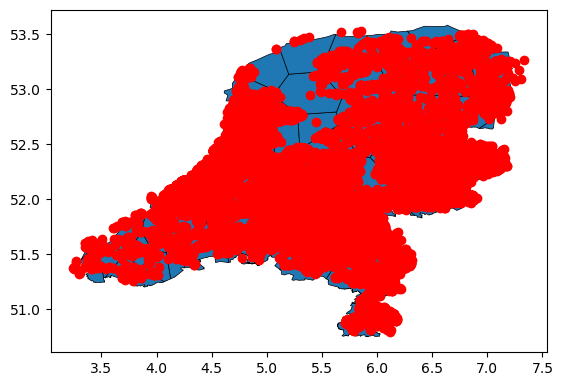

In [81]:

weer.plot(linewidth=0.5, edgecolor='k', legend=True)

plt.scatter(gdf['X'], gdf['Y'], color='red', label='Punten')

# Toon de kaart
plt.show()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\768120647.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X']=df2['X_COORD_x']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\768120647.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y']=df2['Y_COORD_x']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_26716\768120647.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

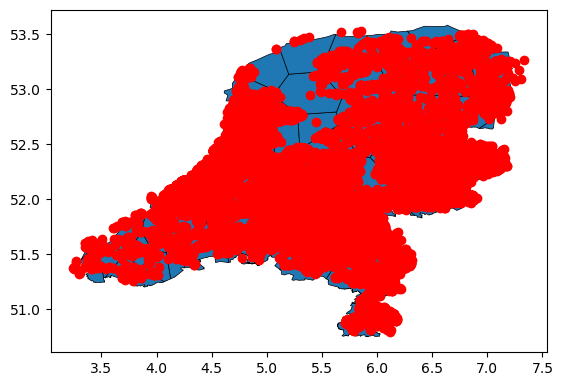

In [82]:
samengevoegd_df = ongevallen.merge(juncties, on='JTE_ID', how='left')
samengevoegd_df['FK_VELD5']=samengevoegd_df['FK_VELD5_y']
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
df= samengevoegd_df
samengevoegd_df = df[df.nunique()[df.nunique() != 1].index]
samengevoegd_df.drop(columns=['AP4_CODE', 'AP5_CODE', 'FK_VELD5_y', 'X_COORD_y', 'Y_COORD_y', 
                              'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER',
                              'TIJDSTIP', 'UUR', 'DDL_ID', 'DAGTYPE', 'WEEKNR',
                              'ANTL_SEH','ANTL_GOV','ANTL_TDT', 'MNE_CODE', 'ZAD_ID', 'WGD_CODE_2',
                              'IND_ALC'], inplace=True)

df= samengevoegd_df
# df.columns
df2=df[['X_COORD_x', 'Y_COORD_x', 'VKL_NUMMER']]
df2['X']=df2['X_COORD_x']
df2['Y']=df2['Y_COORD_x']
df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

trans = Transformer.from_crs("ETRS89", "EPSG:4326", always_xy=True)
xx, yy = trans.transform(df2["X"].values, df2["Y"].values)

df2["X"] = xx
df2["Y"] = yy
df2["X"] = (df2["X"]/64000)+3
df2["Y"] = (df2["Y"]/110000)+48

# df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

df2=df2[['X', 'Y', 'VKL_NUMMER']]
df2.dropna()
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.X, df2.Y))
gdf.dropna()

weer.plot(linewidth=0.5, edgecolor='k', legend=True)

plt.scatter(gdf['X'], gdf['Y'], color='red', label='Punten')

# Toon de kaart
plt.show()

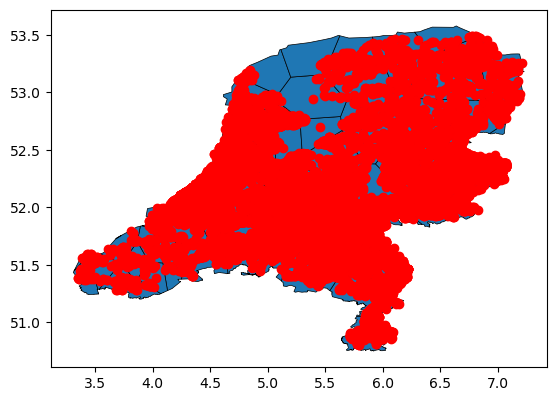

In [83]:
# Plot de geometrieën van het samengevoegde GeoDataFrame
weer.plot(linewidth=0.5, edgecolor='k', legend=True)

# Plot de punten
plt.scatter(merged_gdf['X'], merged_gdf['Y'], color='red', label='Punten')

# Toon de plot
plt.show()

In [84]:
df= pd.read_csv("weerstations_noordholland.csv" , sep=';')
weer = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['WKT']))
weer['STN']=weer['STN_y']
weer.drop(columns=['WKT', 'STN_x', 'STN_y'], inplace=True)

In [85]:
weer

,fid,LON(east),LAT(north),ALT(m),NAME,geometry,STN
0,24,5.180,52.100,1.9,De Bilt,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1...",260
1,25,5.274,52.130,13.9,Soesterberg,"MULTIPOLYGON (((5.16702 52.32124, 5.19106 52.3...",265
2,28,4.430,52.171,-0.2,Valkenburg Zh,"MULTIPOLYGON (((4.62169 52.21579, 4.62162 52.2...",210
3,29,4.790,52.318,-3.3,Schiphol,"MULTIPOLYGON (((5.02839 52.28670, 5.02820 52.2...",240
4,31,4.555,52.463,4.4,IJmuiden,"MULTIPOLYGON (((4.58437 52.27886, 4.58451 52.2...",225
5,32,4.518,52.465,0.0,IJmond,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3...",209
6,33,4.603,52.506,8.5,Wijk aan Zee,"MULTIPOLYGON (((4.56887 52.49745, 4.56924 52.4...",257
7,34,5.174,52.634,0.8,Wijdenes,"MULTIPOLYGON (((5.27671 52.68508, 5.26938 52.6...",248
8,38,4.979,52.644,-2.4,Berkhout,"MULTIPOLYGON (((5.06081 52.57997, 5.07205 52.5...",249
9,40,5.401,52.649,7.3,Houtribdijk,"MULTIPOLYGON (((5.37670 52.76665, 5.37769 52.7...",258


In [86]:
# Uw eerste GeoDataFrame met POINT-geometrie
gdf_points = gdf

# Uw tweede GeoDataFrame met MULTIPOLYGON-geometrie
# gdf_multipolygons = gdf_multipolygons.to_crs(epsg=4258)
gdf_multipolygons = weer
  

# Samenvoegen op basis van locatie van punten binnen veelhoeken
merged_gdf = gpd.sjoin(gdf_points, gdf_multipolygons, op='within')

# print(merged_gdf)
merged_gdf

c:\Users\tjibb\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,X,Y,VKL_NUMMER,geometry,index_right,fid,LON(east),LAT(north),ALT(m),NAME,STN
394,4.771971,52.730472,20210080706,POINT (4.77197 52.73047),11,43,4.781,52.928,1.2,De Kooy,235
398,4.778672,52.738382,20210080712,POINT (4.77867 52.73838),11,43,4.781,52.928,1.2,De Kooy,235
401,4.696325,52.732565,20210080716,POINT (4.69632 52.73256),11,43,4.781,52.928,1.2,De Kooy,235
497,4.807741,52.936414,20210081452,POINT (4.80774 52.93641),11,43,4.781,52.928,1.2,De Kooy,235
501,4.861515,52.783882,20210081457,POINT (4.86152 52.78388),11,43,4.781,52.928,1.2,De Kooy,235
...,...,...,...,...,...,...,...,...,...,...,...
30477,4.606897,52.221638,20210008314,POINT (4.60690 52.22164),2,28,4.430,52.171,-0.2,Valkenburg Zh,210
37179,4.565778,52.224318,20210011087,POINT (4.56578 52.22432),2,28,4.430,52.171,-0.2,Valkenburg Zh,210
43377,4.595618,52.256620,20210058809,POINT (4.59562 52.25662),2,28,4.430,52.171,-0.2,Valkenburg Zh,210
50305,4.594517,52.249574,20210038616,POINT (4.59452 52.24957),2,28,4.430,52.171,-0.2,Valkenburg Zh,210


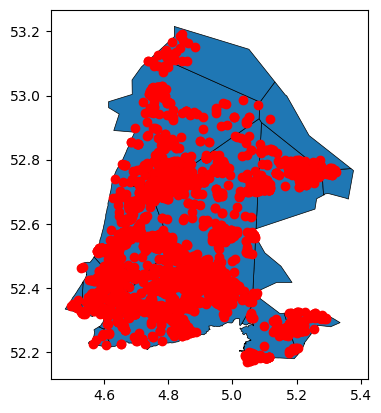

In [87]:
# Plot de geometrieën van het samengevoegde GeoDataFrame
weer.plot(linewidth=0.5, edgecolor='k', legend=True)

# Plot de punten
plt.scatter(merged_gdf['X'], merged_gdf['Y'], color='red', label='Punten')

# Toon de plot
plt.show()